## Нормализация батча

In [1]:
import torch

In [2]:
tensor = torch.rand(5, 3)
tensor

tensor([[0.3822, 0.9359, 0.0109],
        [0.7258, 0.4768, 0.5785],
        [0.4405, 0.4651, 0.5377],
        [0.0836, 0.1557, 0.3758],
        [0.3791, 0.2652, 0.4593]])

In [6]:
mu = tensor.mean(0)
mu

tensor([0.4022, 0.4597, 0.3924])

In [8]:
(tensor - mu).square()

tensor([[4.0069e-04, 2.2674e-01, 1.4553e-01],
        [1.0469e-01, 2.9226e-04, 3.4622e-02],
        [1.4640e-03, 2.8535e-05, 2.1095e-02],
        [1.0154e-01, 9.2466e-02, 2.7737e-04],
        [5.3609e-04, 3.7841e-02, 4.4664e-03]])

In [9]:
# Стандартное отклонение
sigma = (tensor - mu).square().mean(0)

sigma

tensor([0.0417, 0.0715, 0.0412])

In [11]:
def get_mean_std(x):
    mu = x.mean(0)
    return mu, (x - mu).square().mean(0)

In [12]:
get_mean_std(tensor)

(tensor([0.4022, 0.4597, 0.3924]), tensor([0.0417, 0.0715, 0.0412]))

#### Приведем батч к виду: среднее - 0, стандартное отклонение 1

In [13]:
batch_hat = (tensor - mu) / (sigma + 1e-8).sqrt()

batch_hat

tensor([[-0.0980,  1.7811, -1.8795],
        [ 1.5840,  0.0639,  0.9167],
        [ 0.1873,  0.0200,  0.7156],
        [-1.5600, -1.1374, -0.0821],
        [-0.1133, -0.7276,  0.3293]])

In [15]:
get_mean_std(batch_hat)

(tensor([ 0.0000e+00, -1.1921e-07,  5.5134e-08]),
 tensor([1.0000, 1.0000, 1.0000]))

#### Нормализуем - приведем к виду: batch*gamma + beta

In [18]:
# гамма и бета для каждого признака своя: 1000 признаков: 1000 гамма + 1000 бета
gamma = torch.ones(3)
beta = torch.zeros(3) - 0.5
batch_norm = batch_hat * gamma + beta

batch_norm

tensor([[-0.5980,  1.2811, -2.3795],
        [ 1.0840, -0.4361,  0.4167],
        [-0.3127, -0.4800,  0.2156],
        [-2.0600, -1.6374, -0.5821],
        [-0.6133, -1.2276, -0.1707]])

In [19]:
get_mean_std(batch_norm)

(tensor([-0.5000, -0.5000, -0.5000]), tensor([1.0000, 1.0000, 1.0000]))

## Нормализация входных данных

In [21]:
import numpy as np
from torchvision.datasets import MNIST
import torchvision.transforms as T

In [22]:
mnist_train = MNIST('../datasets/mnist', transform = T.ToTensor())

In [25]:
mnist_train.data.shape

torch.Size([60000, 28, 28])

#### Среднее и стандартное отклонение сейчас

In [28]:
mean = mnist_train.data.to(torch.float32).mean().item() / 255
mean

0.1306604871562883

In [30]:
std = mnist_train.data.to(torch.floaиt32).std().item() / 255

std

0.30810780244715075

### Встроенная функция нормализации

In [32]:
normalize = T.Normalize(mean = (mean), std = (std))

In [33]:
mnist_train[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [35]:
normalized_image = normalize(mnist_train[0][0])
normalized_image

tensor([[[-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241],
         [-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241],
         [-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241],
         [-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0

### Среднее и стандартное отклонение на 1 объекте

In [36]:
normalized_image.mean(), normalized_image.std() 

(tensor(0.0228), tensor(1.0144))

### Среднее и стандартное отклонение на всем датасете

In [37]:
normalize(mnist_train.data.to(torch.float32) / 255).mean()

tensor(-5.6966e-08)

In [38]:
normalize(mnist_train.data.to(torch.float32) / 255).std()

tensor(1.0000)

## Инициализация параметров в слоях

In [42]:
n = 5 # число признаков
default_values = (2.0 / np.sqrt(n)) * np.random.randint(0, 1)

In [43]:
default_values

np.float64(0.0)

### Работа с CIFAR10

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
import torchvision
import torchvision.transforms as T

dataset_train = torchvision.datasets.CIFAR10(
    root = '../datasets',
    train = True,
    #transform = T.ToTensor()
)

In [21]:
dataset_test = torchvision.datasets.CIFAR10(
    root = '../datasets',
    train = False,
    #transform = T.ToTensor()
)

In [22]:
dataset_train[0]

(<PIL.Image.Image image mode=RGB size=32x32>, 6)

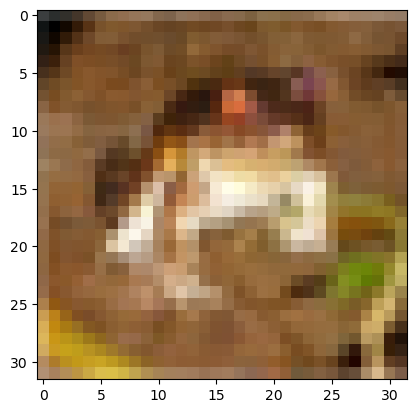

In [24]:
plt.imshow(dataset_train[0][0])
plt.show()

In [27]:
img_matrix = np.array(dataset_train[0][0]) / 255

img_matrix.shape

(32, 32, 3)

### Проведем нормализацию данных

In [28]:
dataset_train = torchvision.datasets.CIFAR10(
    root = '../datasets',
    train = True,
    transform = T.ToTensor()
)

In [29]:
dataset_train.data.shape

(50000, 32, 32, 3)

In [31]:
# найдем среднее по всем 3 слоям - RGB
means = (dataset_train.data / 255).mean(axis = (0, 1, 2))

means

array([0.49139968, 0.48215841, 0.44653091])

In [32]:
stds = (dataset_train.data / 255).std(axis = (0, 1, 2))

stds

array([0.24703223, 0.24348513, 0.26158784])

In [33]:
import torchvision.transforms as T

transforms = T.Compose(
    [
        T.ToTensor(),
        T.Normalize(mean = means, std = stds)
    ]
)

In [75]:
from torch.utils.data import DataLoader

dataset_train = CIFAR10('../datasets', train = True, transform = transforms)
valid_test = CIFAR10('../datasets', train = False, transform = transforms)

train_loader = DataLoader(dataset_train, batch_size = 128, shuffle = True, num_workers = 8)
valid_loader = DataLoader(valid_test, batch_size = 128, shuffle = True, num_workers = 8)

#### Функция обучения модели по батчам

In [ ]:
from tqdm import tqdm

def train(model):
    model.train()

    train_loss = 0
    total = 0
    correct = 0

    for x, y in tqdm(train_loader, desc = 'Train'):
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()

        output = model(x)
        
        loss = loss_fn(output, y)

        train_loss += loss.item()

        loss.backward()

        optimizer.step()

        _, y_pred = torch.max(output, 1)
        total += y.size(0)
        correct += (y_pred == y).sum().item()

    train_loss /= len(train_loader)
    accuracy = correct / total

    return train_loss, accuracy

#### Функция оценки модели по батчам

In [85]:
import torch
@torch.inference_mode()
def evaluate(model, loader) -> tuple[float, float]:
    model.eval()

    total_loss = 0
    total = 0
    correct = 0

    for x, y in tqdm(loader, desc = 'Test'):
        x, y = x.to(device), y.to(device)

        output = model(x)

        loss = loss_fn(output, y)

        total_loss += loss.item()

        _, y_pred = torch.max(output, 1)
        total += y.size(0)
        correct += (y_pred == y).sum().item()

    total_loss /= len(loader)
    accuracy = correct / total
    return total_loss, accuracy

#### Вывод статистик

In [86]:
from IPython.display import clear_output

def plot_stats(
    train_loss: list[float],
    test_loss: list[float],
    train_accuracy: list[float],
    test_accuracy: list[float],
    title: str
):
    plt.figure(figsize = (16, 10))

    plt.title(title + ' loss')
    plt.plot(train_loss, label  = 'Train Loss')
    plt.plot(test_loss, label  = 'Test Loss')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize = (16, 10))
    plt.title(title + ' accuracy')
    plt.plot(train_accuracy, label = 'Train accuracy')
    plt.plot(test_accuracy, label = 'Test accuracy')
    plt.legend()
    plt.grid()
    plt.show()
    

#### Полный цикл обучения и оценки

In [87]:
def whole_train_value_cycle(model, num_epochs, title):
    train_loss_history, valid_loss_history = [], []
    train_accuracy_history, valid_accuracy_history = [], []

    for epoch in range(num_epochs):
        train_loss, train_accuracy = train(model)
        valid_loss, valid_accuracy = evaluate(model, valid_loader)

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)
        
        train_accuracy_history.append(train_accuracy)
        valid_accuracy_history.append(valid_accuracy)

        clear_output()

        plot_stats(
            train_loss_history, valid_loss_history,
            train_accuracy_history, valid_accuracy_history,
            title
        )

In [88]:
import torch.nn as nn
from torch.optim import Adam

In [89]:
class FirstModel(nn.Module):

    def __init__(self):
        super().__init__()

        self.net = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 3, padding = 1), # 32 x 32 x 16
            nn.ReLU(),

            nn.MaxPool2d(2), # 16 x 16 x 16

            nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, padding = 1), # 16 x 16 x 32
            nn.ReLU(),

            nn.MaxPool2d(2), # 8 x 8 x 32

            nn.Flatten(),

            nn.Linear(8 * 8 * 32, 1024),
            nn.ReLU(),
            nn.Linear(1024, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

In [90]:
device = torch.device('cpu')

print(device)

loss_fn = nn.CrossEntropyLoss()

cpu


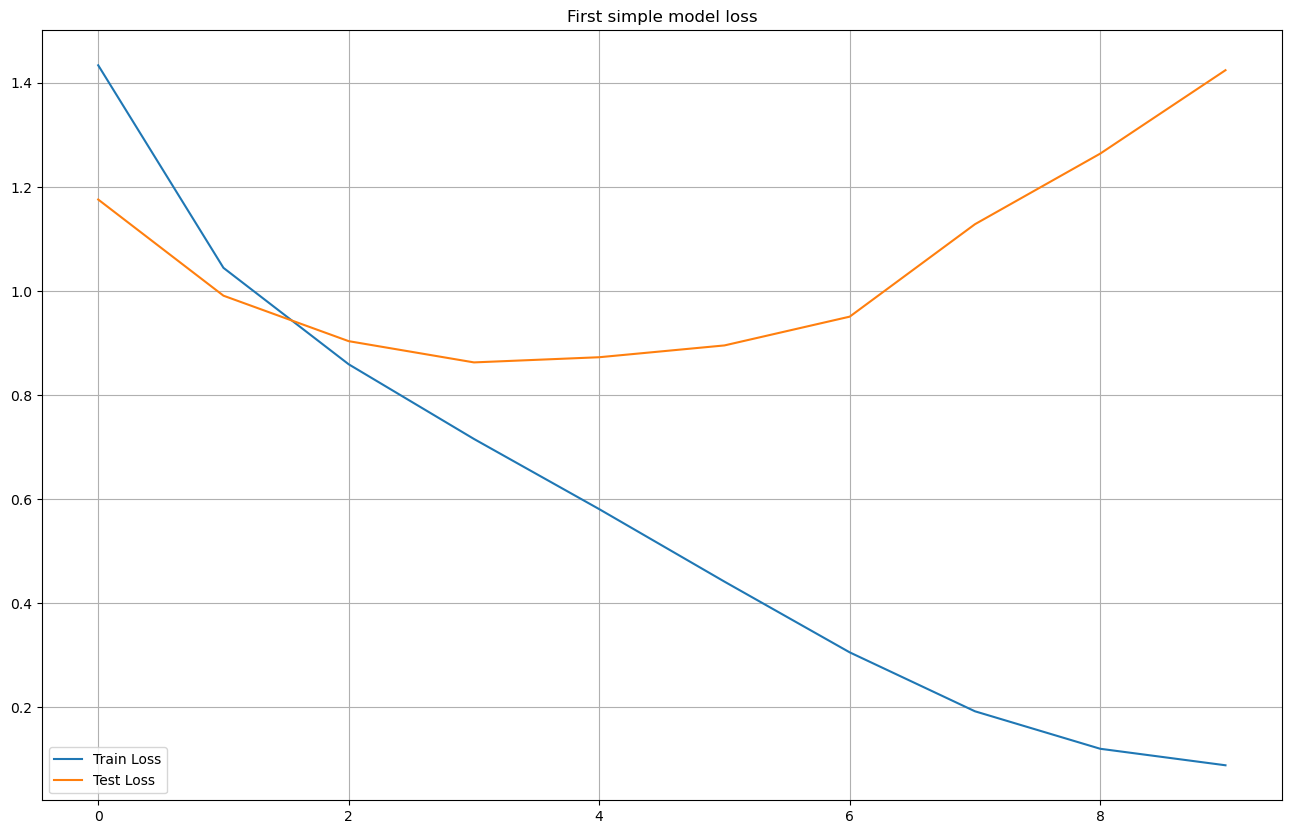

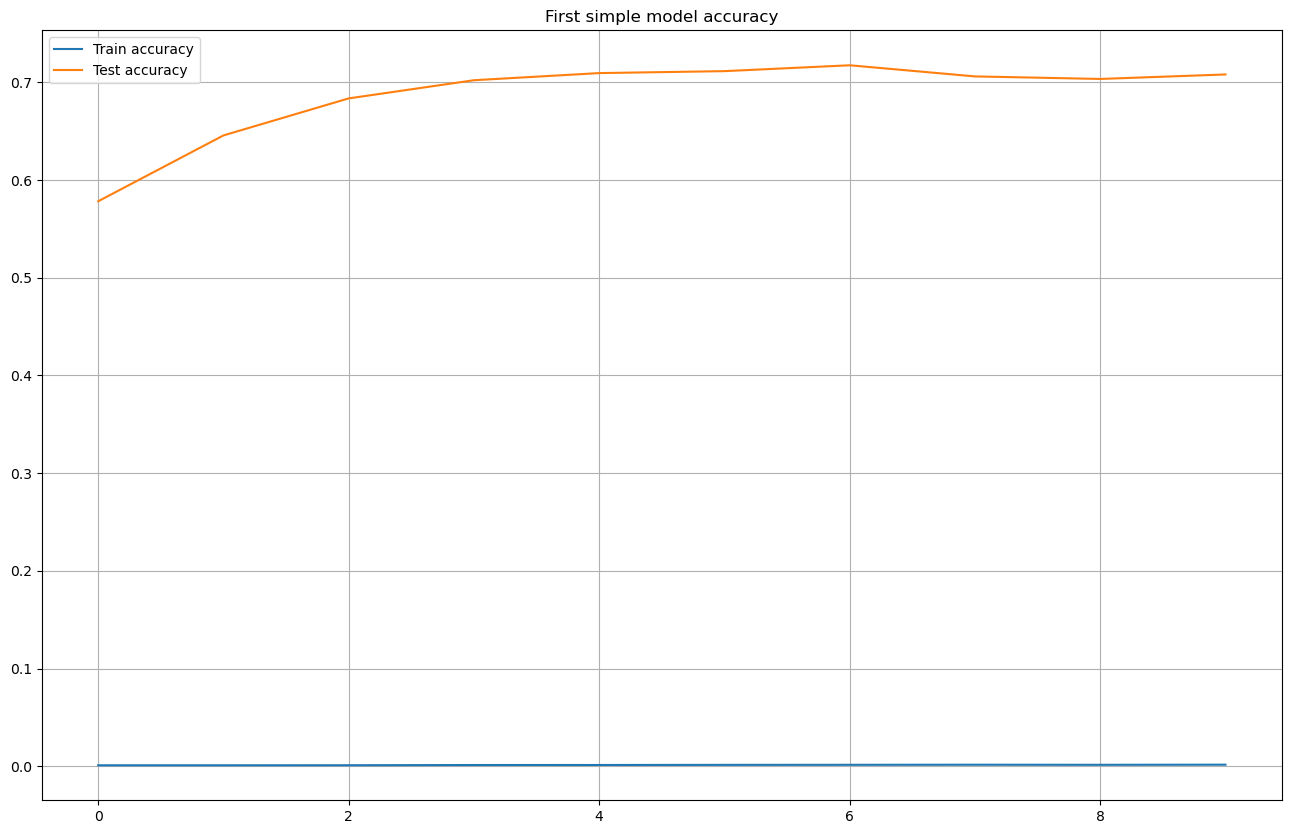

In [91]:
model = FirstModel().to(device)

optimizer = Adam(model.parameters(), lr = 1e-3)

whole_train_value_cycle(model, 10, 'First simple model')

In [94]:
class SecondModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.net = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1), # 32 x 32 x 32
            nn.ReLU(),
            nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, padding = 1), # 32 x 32 x 32
            nn.ReLU(),

            nn.MaxPool2d(2), # 16 x 16 x 32

            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1), # 16 x 16 x 64
            nn.ReLU(),
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1), # 16 x 16 x 64
            nn.ReLU(),

            nn.MaxPool2d(2), # 8 x 8 x 64

            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding = 1), # 8 x 8 x 128
            nn.ReLU(),
            nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = 3, padding = 1), # 8 x 8 x 128
            nn.ReLU(),

            nn.MaxPool2d(2), # 4 x 4 x 128
 
            nn.Flatten(),
            nn.Linear(4 * 4 * 128, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, X):
        return self.net(X)

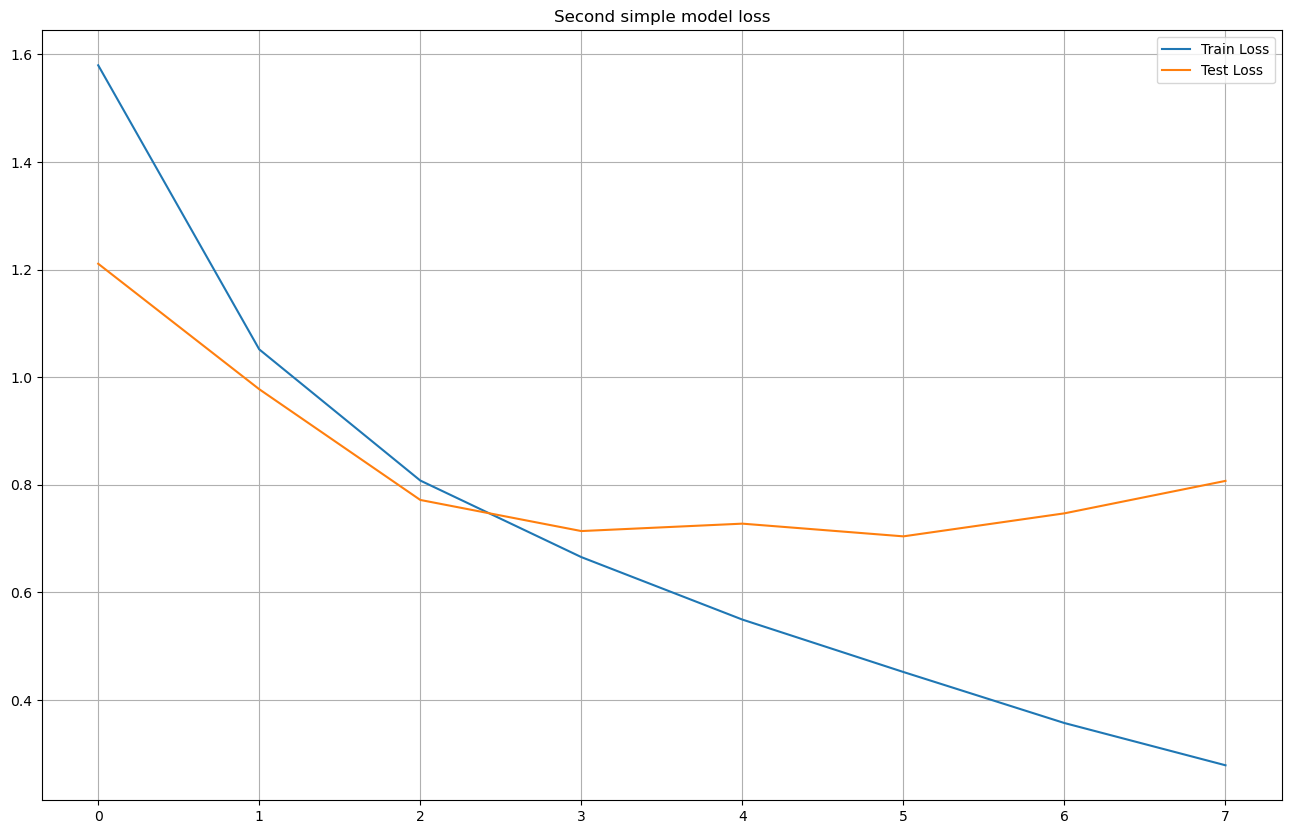

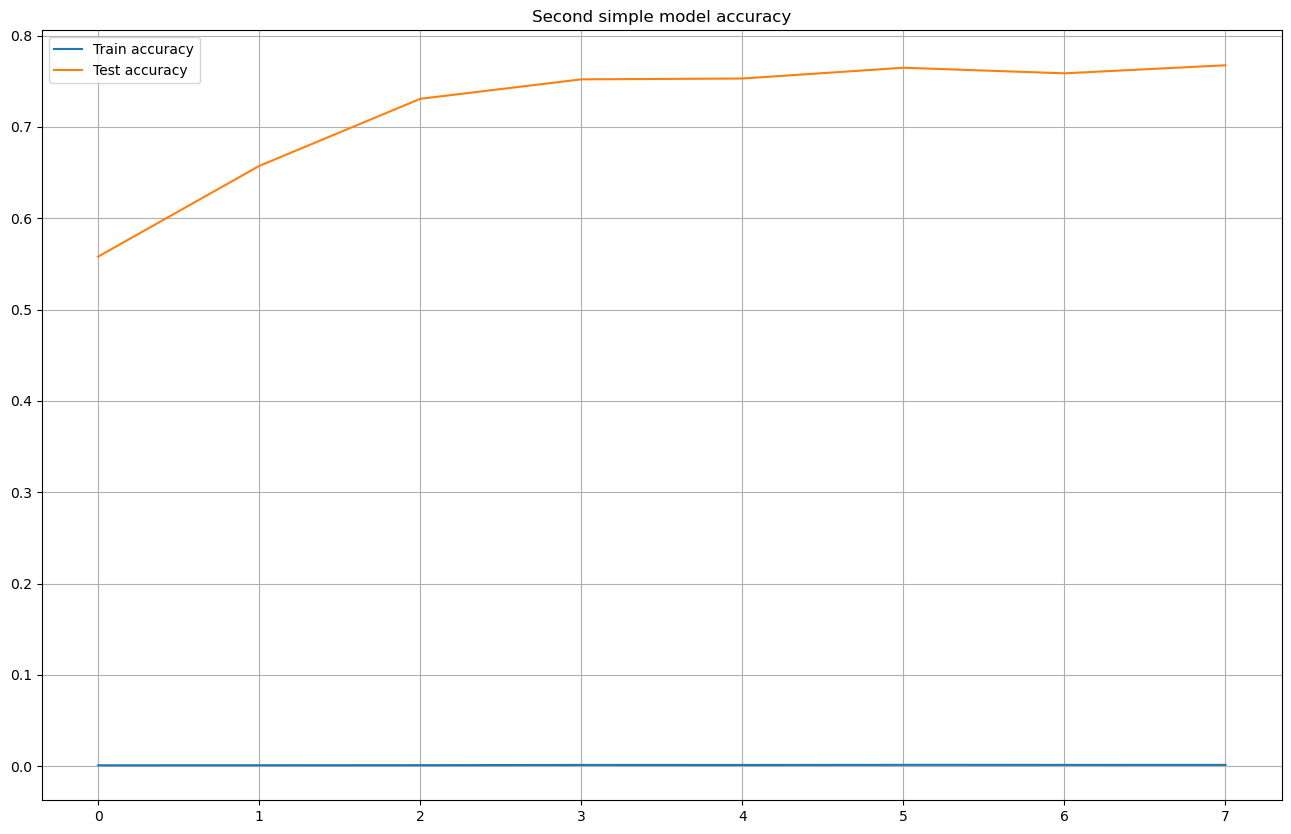

Train:   0%|          | 0/391 [00:20<?, ?it/s]

KeyboardInterrupt



In [96]:
model = SecondModel().to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = Adam(model.parameters(), lr = 1e-3)

whole_train_value_cycle(model, 10, 'Second simple model')

### Добавим нормализацию BatchNorm2d/1d

In [97]:
class ThirdModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.net = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1), # 32 x 32 x 32
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, padding = 1), # 32 x 32 x 32
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.MaxPool2d(2), # 16 x 16 x 32

            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1), # 16 x 16 x 64
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1), # 16 x 16 x 64
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.MaxPool2d(2), # 8 x 8 x 64

            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding = 1), # 8 x 8 x 128
            nn.BatchNorm2d(128),
            nn.ReLU(),
            
            nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = 3, padding = 1), # 8 x 8 x 128
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.MaxPool2d(2), # 4 x 4 x 128
 
            nn.Flatten(),
            nn.Linear(4 * 4 * 128, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, X):
        return self.net(X)

### Добавим Dropout

In [98]:
class FourthModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.net = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1), # 32 x 32 x 32
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, padding = 1), # 32 x 32 x 32
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.MaxPool2d(2), # 16 x 16 x 32
            nn.Dropout2d(p = 0.2),
            
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1), # 16 x 16 x 64
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1), # 16 x 16 x 64
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.MaxPool2d(2), # 8 x 8 x 64
            nn.Dropout2d(p = 0.2),
            
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding = 1), # 8 x 8 x 128
            nn.BatchNorm2d(128),
            nn.ReLU(),
            
            nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = 3, padding = 1), # 8 x 8 x 128
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.MaxPool2d(2), # 4 x 4 x 128
            nn.Dropout2d(p = 0.2),
            
            nn.Flatten(),
            nn.Linear(4 * 4 * 128, 512),
            nn.BatchNorm1d(512),
            nn.Dropout2d(p = 0.2),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, X):
        return self.net(X)

### Аугментация данных

In [99]:
import torchvision.transforms as T

train_transforms = T.Compose(
    [
        T.RandomResizedCrop(size = 32, scale = (0.8, 1.1)),
        T.RandomHorizontalFlip(p = 0.5),
        T.RandomAdjustSharpness(sharpness_factor = 2),
        T.ToTensor(),
        T.Normalize(mean = means, std = stds)
    ]
)

test_transforms = T.Compose(
    [
        T.ToTensor(),
        T.Normalize(mean = means, std = stds)
    ]
)


In [102]:
from torch.utils.data import DataLoader

dataset_train = CIFAR10('../datasets', train = True, transform = train_transforms)
valid_test = CIFAR10('../datasets', train = False, transform = test_transforms)

train_loader = DataLoader(dataset_train, batch_size = 128, shuffle = True, num_workers = 8)
valid_loader = DataLoader(valid_test, batch_size = 128, shuffle = True, num_workers = 8)

### Аугментация конкретно под CIFAR10

In [103]:
import torchvision.transforms as T

train_transforms = T.Compose(
    [
        T.AutoAugment(T.AutoAugmentPolicy.CIFAR10),
        T.ToTensor(),
        T.Normalize(mean = means, std = stds)
    ]
)

test_transforms = T.Compose(
    [
        T.ToTensor(),
        T.Normalize(mean = means, std = stds)
    ]
)


In [104]:
from torch.utils.data import DataLoader

dataset_train = CIFAR10('../datasets', train = True, transform = train_transforms)
valid_test = CIFAR10('../datasets', train = False, transform = test_transforms)

train_loader = DataLoader(dataset_train, batch_size = 128, shuffle = True, num_workers = 8)
valid_loader = DataLoader(valid_test, batch_size = 128, shuffle = True, num_workers = 8)

### Добавим адаптивную длину шага

In [108]:
def whole_train_value_cycle_with_scheduler(model, num_epochs, title):
    train_loss_history, valid_loss_history = [], []
    train_accuracy_history, valid_accuracy_history = [], []

    for epoch in range(num_epochs):
        train_loss, train_accuracy = train(model)
        valid_loss, valid_accuracy = evaluate(model, valid_loader)

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)
        
        train_accuracy_history.append(train_accuracy)
        valid_accuracy_history.append(valid_accuracy)

        clear_output()

        plot_stats(
            train_loss_history, valid_loss_history,
            train_accuracy_history, valid_accuracy_history,
            title
        )
        scheduler.step()

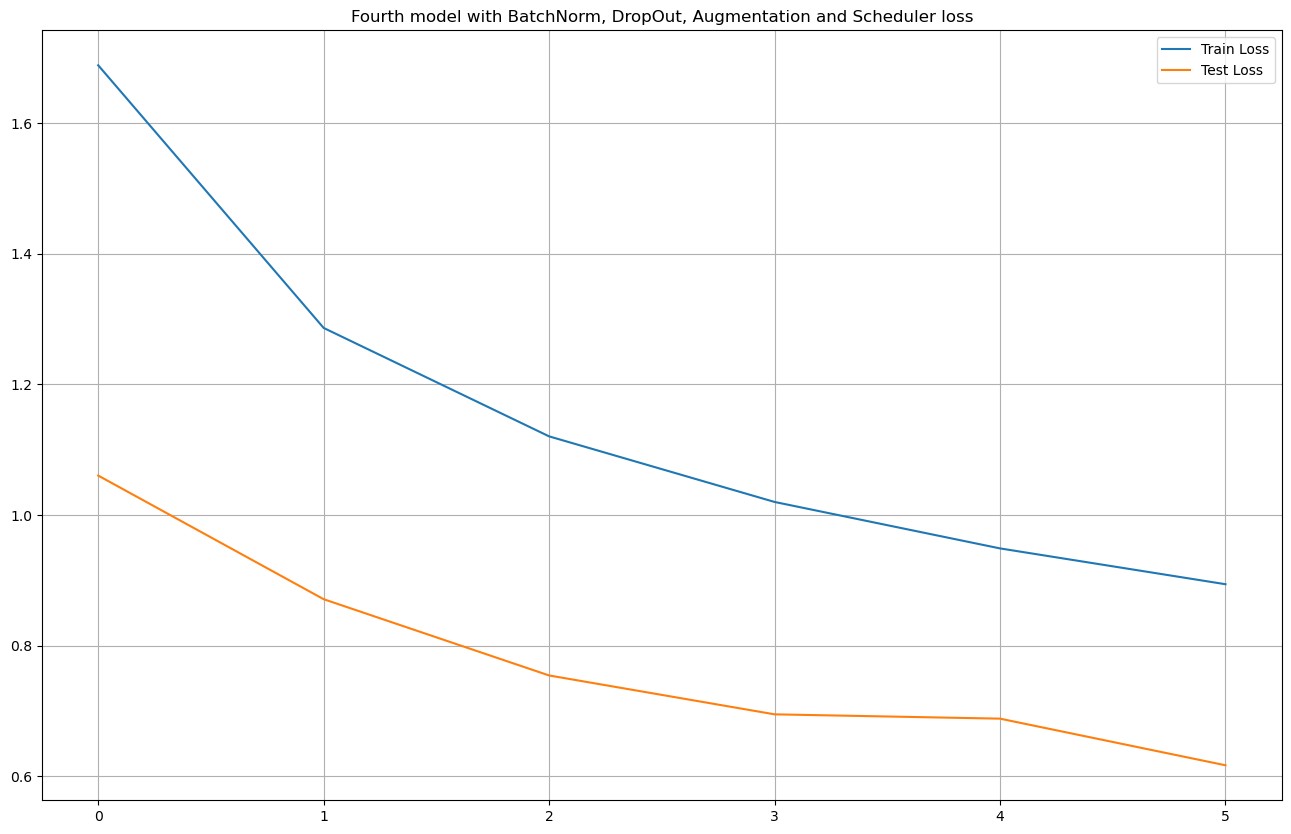

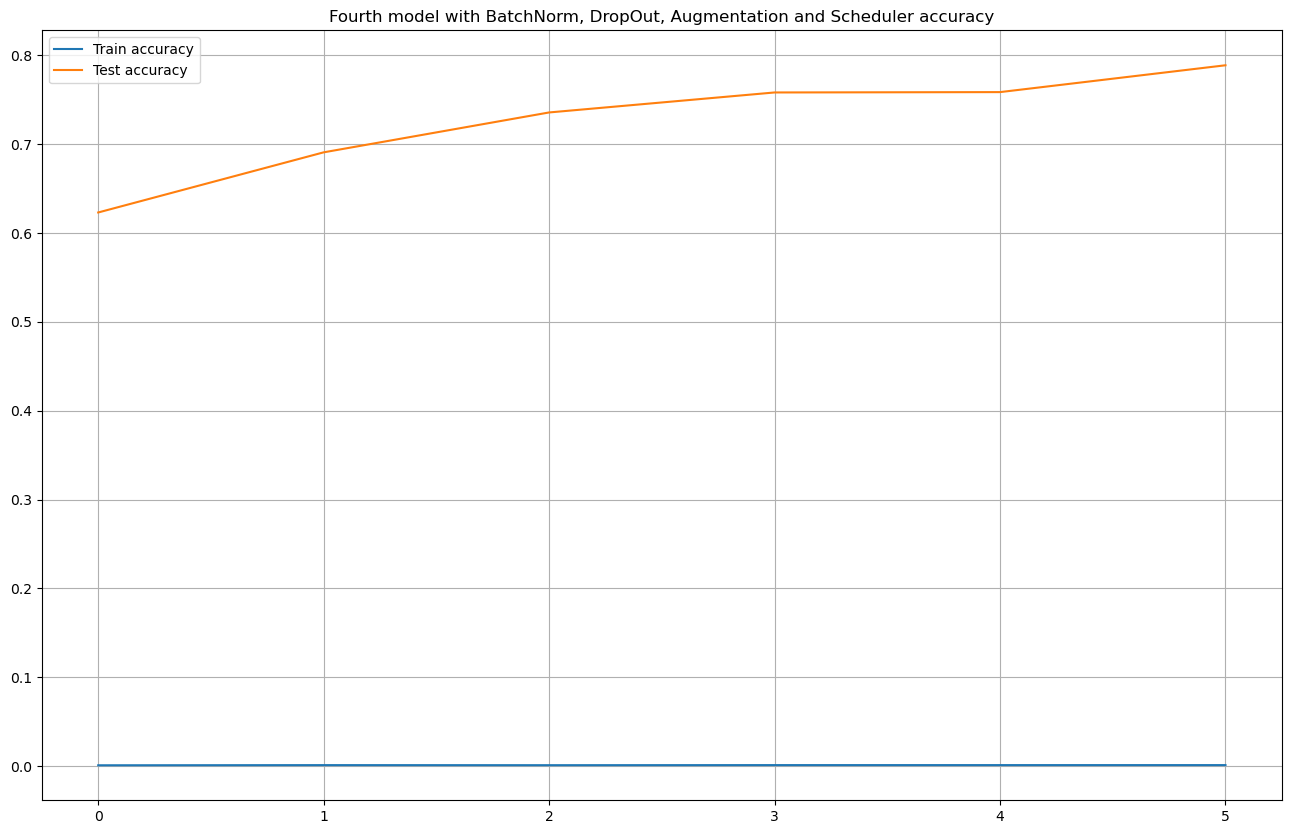

Train:   0%|          | 0/391 [00:00<?, ?it/s]

In [ ]:
from torch.optim.lr_scheduler import StepLR

model = FourthModel().to(device)

optimizer = Adam(model.parameters(), lr = 1e-3)
scheduler = StepLR(optimizer, step_size = 25, gamma = 0.1)

whole_train_value_cycle_with_scheduler(model, 40, 'Fourth model with BatchNorm, DropOut, Augmentation and Scheduler')